<a href="https://colab.research.google.com/github/Meet-Patel2580/Reinforcement_Learning/blob/main/Neural_Networks_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST DATASET

convnets: 
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

mnist 1
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

mnist 2 
https://nextjournal.com/gkoehler/pytorch-mnist


cifar10
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html


In [ ]:
#imports
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch import nn, optim

!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

from torchvision.datasets import MNIST
from torchvision import transforms

In [40]:
#dowloading images 
train_set = MNIST('./', download=True,
transform=transforms.Compose([
transforms.ToTensor(),
]), train=True)

test_set = MNIST('./', download=True,
transform=transforms.Compose([
transforms.ToTensor(),
]), train=False)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [41]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

#number of images: 64, dimensions: 28x28 pixels
#64 labels
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


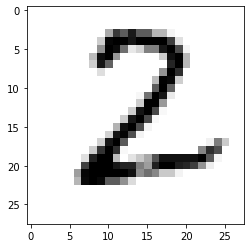

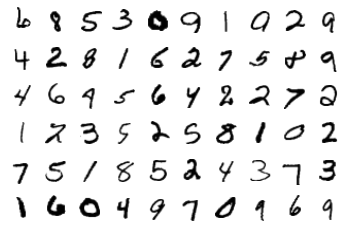

In [42]:
#displaying image
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

#displaying data set
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [43]:
#creating the neural network
#input size is 784,  layer 1: 128, layer 2:64 and output consists of 10 units 
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

#wraps layers together, 3 layers with Relu activation which turns all negative values to 0
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [44]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [45]:
#training process

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images) #pass image through network
        loss = criterion(output, labels) #calculate loss
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.9588554034005604
Epoch 1 - Training loss: 0.32894808720392205
Epoch 2 - Training loss: 0.2724363042522214
Epoch 3 - Training loss: 0.229724504184653
Epoch 4 - Training loss: 0.19792081794139546
Epoch 5 - Training loss: 0.17238421234558385
Epoch 6 - Training loss: 0.15132373691335924
Epoch 7 - Training loss: 0.13415326984492001
Epoch 8 - Training loss: 0.12015619746316025
Epoch 9 - Training loss: 0.10809949611418887
Epoch 10 - Training loss: 0.09794974412375898
Epoch 11 - Training loss: 0.0897954318350725
Epoch 12 - Training loss: 0.08231386472719279
Epoch 13 - Training loss: 0.07642122191776123
Epoch 14 - Training loss: 0.07078618910372146
Epoch 15 - Training loss: 0.06595551077105692
Epoch 16 - Training loss: 0.061225342838816456
Epoch 17 - Training loss: 0.05687514895340924
Epoch 18 - Training loss: 0.053605240177927116
Epoch 19 - Training loss: 0.05005481145702112
Epoch 20 - Training loss: 0.04707198309824308
Epoch 21 - Training loss: 0.04422516941722395
E

In [46]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


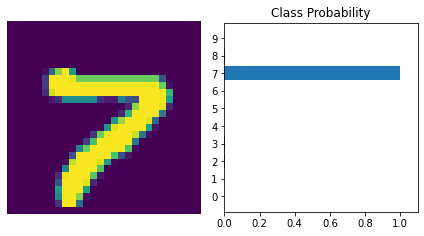

In [76]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [48]:


correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.978


In [67]:
torch.save(model, './my_mnist_model.pt') 